<a href="https://colab.research.google.com/github/Anusha19011901/bb84/blob/main/masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('hospital.csv')
df

,patcnty1,dsch_yr,race_grp1,Discharges,mdc_desc,gender
0,Alameda,2012,Aisan,27637.0,"NERVOUS SYSTEM, DISEASES & DISORDERS",Female
1,Alameda,2012,Black,28455.0,"EYE, DISEASES & DISORDERS",Male
2,Alameda,2012,Hispanic,25162.0,"EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS",Unknown
3,Alameda,2012,American,467.0,"RESPIRATORY SYSTEM, DISEASES & DISORDERS",Female
4,Alameda,2012,Other,6796.0,"CIRCULATORY SYSTEM, DISEASES & DISORDERS",Male
...,...,...,...,...,...,...
2839,Yuba,2018,Hispanic,1566.0,FACTORS ON HEALTH STATUS & OTHER CONTACTS WITH...,Unknown
2840,Yuba,2018,American,96.0,MULTIPLE SIGNFICANT TRAUMA,Female
2841,Yuba,2018,Other,197.0,HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS,Male
2842,Yuba,2018,Unknown,69.0,"NERVOUS SYSTEM, DISEASES & DISORDERS",Unknown


In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df.Discharges = imputer.fit_transform(df['Discharges'].values.reshape(-1,1))[:,0]

In [4]:
df.to_csv('restored_hospital.csv', index=False)
df

,patcnty1,dsch_yr,race_grp1,Discharges,mdc_desc,gender
0,Alameda,2012,Aisan,27637.0,"NERVOUS SYSTEM, DISEASES & DISORDERS",Female
1,Alameda,2012,Black,28455.0,"EYE, DISEASES & DISORDERS",Male
2,Alameda,2012,Hispanic,25162.0,"EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS",Unknown
3,Alameda,2012,American,467.0,"RESPIRATORY SYSTEM, DISEASES & DISORDERS",Female
4,Alameda,2012,Other,6796.0,"CIRCULATORY SYSTEM, DISEASES & DISORDERS",Male
...,...,...,...,...,...,...
2839,Yuba,2018,Hispanic,1566.0,FACTORS ON HEALTH STATUS & OTHER CONTACTS WITH...,Unknown
2840,Yuba,2018,American,96.0,MULTIPLE SIGNFICANT TRAUMA,Female
2841,Yuba,2018,Other,197.0,HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS,Male
2842,Yuba,2018,Unknown,69.0,"NERVOUS SYSTEM, DISEASES & DISORDERS",Unknown


Stratified sampling

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

df = pd.read_csv('restored_hospital.csv')
df

,patcnty1,dsch_yr,race_grp1,Discharges,mdc_desc,gender
0,Alameda,2012,Aisan,27637.0,"NERVOUS SYSTEM, DISEASES & DISORDERS",Female
1,Alameda,2012,Black,28455.0,"EYE, DISEASES & DISORDERS",Male
2,Alameda,2012,Hispanic,25162.0,"EAR, NOSE, MOUTH, & THROAT, DISEASES & DISORDERS",Unknown
3,Alameda,2012,American,467.0,"RESPIRATORY SYSTEM, DISEASES & DISORDERS",Female
4,Alameda,2012,Other,6796.0,"CIRCULATORY SYSTEM, DISEASES & DISORDERS",Male
...,...,...,...,...,...,...
2839,Yuba,2018,Hispanic,1566.0,FACTORS ON HEALTH STATUS & OTHER CONTACTS WITH...,Unknown
2840,Yuba,2018,American,96.0,MULTIPLE SIGNFICANT TRAUMA,Female
2841,Yuba,2018,Other,197.0,HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS,Male
2842,Yuba,2018,Unknown,69.0,"NERVOUS SYSTEM, DISEASES & DISORDERS",Unknown


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


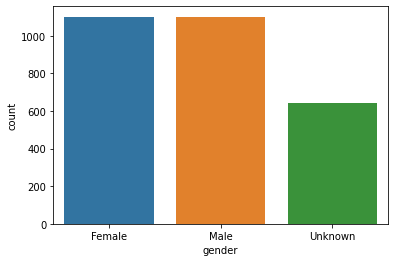

In [6]:
import seaborn as sns
from matplotlib import pyplot
sns.countplot(df.gender)
pyplot.show()

In [7]:
df.gender


0        Female
1          Male
2       Unknown
3        Female
4          Male
         ...   
2839    Unknown
2840     Female
2841       Male
2842    Unknown
2843     Female
Name: gender, Length: 2844, dtype: object

In [8]:
N=700
df = df.groupby('gender', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [9]:
df.to_csv('stratified_hospital.csv', index=False)
df

,patcnty1,dsch_yr,race_grp1,Discharges,mdc_desc,gender
0,Mendocino,2016,American,442.0,"DIGESTIVE SYSTEM, DISEASES & DISORDERS",Female
1,Tuolumne,2013,Other,96.0,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",Unknown
2,Tuolumne,2017,American,18.0,BURNS,Unknown
3,Colusa,2017,Aisan,25.0,"KIDNEY AND URINARY TRACT, DISEASES & DISORDERS",Male
4,San Luis Obispo,2013,Black,318.0,"MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DI...",Female
...,...,...,...,...,...,...
695,Mendocino,2015,Aisan,90.0,BURNS,Unknown
696,Yuba,2013,Aisan,390.0,"MALE REPRODUCTIVE SYSTEM, DISEASES & DISORDERS",Male
697,Amador,2014,White,3703.0,"BLOOD, BLOOD FORMING ORGANS, IMMUNOLOGICAL, DI...",Male
698,Humboldt,2016,White,10992.0,NEWBORNS AND NEONATE CONDITIONS BEGAN IN PERIN...,Unknown


Feature Scaling data using normalization method

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('stratified_hospital.csv')
df

,patcnty1,dsch_yr,race_grp1,Discharges,mdc_desc,gender
0,Mendocino,2016,American,442.0,"DIGESTIVE SYSTEM, DISEASES & DISORDERS",Female
1,Tuolumne,2013,Other,96.0,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",Unknown
2,Tuolumne,2017,American,18.0,BURNS,Unknown
3,Colusa,2017,Aisan,25.0,"KIDNEY AND URINARY TRACT, DISEASES & DISORDERS",Male
4,San Luis Obispo,2013,Black,318.0,"MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DI...",Female
...,...,...,...,...,...,...
695,Mendocino,2015,Aisan,90.0,BURNS,Unknown
696,Yuba,2013,Aisan,390.0,"MALE REPRODUCTIVE SYSTEM, DISEASES & DISORDERS",Male
697,Amador,2014,White,3703.0,"BLOOD, BLOOD FORMING ORGANS, IMMUNOLOGICAL, DI...",Male
698,Humboldt,2016,White,10992.0,NEWBORNS AND NEONATE CONDITIONS BEGAN IN PERIN...,Unknown


In [12]:
sc = StandardScaler()
x = df.iloc[:,3:4].values
df['Discharges'] = sc.fit_transform(x)
print(df['Discharges'])

0     -0.286241
1     -0.296445
2     -0.298745
3     -0.298539
4     -0.289898
         ...   
695   -0.296622
696   -0.287774
697   -0.190069
698    0.024895
699   -0.255835
Name: Discharges, Length: 700, dtype: float64


In [13]:
df.to_csv('After_Scaling_hospital.csv', index=False)
df

,patcnty1,dsch_yr,race_grp1,Discharges,mdc_desc,gender
0,Mendocino,2016,American,-0.286241,"DIGESTIVE SYSTEM, DISEASES & DISORDERS",Female
1,Tuolumne,2013,Other,-0.296445,"INJURIES, POISONINGS, AND TOXIC EFFECTS OF DRUGS",Unknown
2,Tuolumne,2017,American,-0.298745,BURNS,Unknown
3,Colusa,2017,Aisan,-0.298539,"KIDNEY AND URINARY TRACT, DISEASES & DISORDERS",Male
4,San Luis Obispo,2013,Black,-0.289898,"MUSCULOSKELETAL SYSTEM & CONNECTIVE TISSUE, DI...",Female
...,...,...,...,...,...,...
695,Mendocino,2015,Aisan,-0.296622,BURNS,Unknown
696,Yuba,2013,Aisan,-0.287774,"MALE REPRODUCTIVE SYSTEM, DISEASES & DISORDERS",Male
697,Amador,2014,White,-0.190069,"BLOOD, BLOOD FORMING ORGANS, IMMUNOLOGICAL, DI...",Male
698,Humboldt,2016,White,0.024895,NEWBORNS AND NEONATE CONDITIONS BEGAN IN PERIN...,Unknown
